In [1]:
import os, sys
from Bio import SeqIO
import pandas as pd
import numpy as np
import joblib
from tqdm.notebook import tqdm
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

In /home/ilya/anaconda3/envs/modelling/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ilya/anaconda3/envs/modelling/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ilya/anaconda3/envs/modelling/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ilya/anaconda3/envs/modelling/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home

In [2]:
#Pravki
#не, 1) у тебя было /path/ это не относительный, 
#а 2) в коде у тебя resources, а в архиве у тебя сразу Files/Gpcrdb_files/...
#задаешь workding_dir, например "./", а потом все остальные через os.path.join(workding_dir, ...)



#open(dir_path+"{}_structure_seq.fasta".format(pdb_id) - везде заменяй на os.path.join

#в GPCRdb_mapping_for_sequence не нужно два раза считывать файл
#Видимо, мой прошлый коммент про считывания относился к этому
#if "ATOM" in line:
#                seq_num.append(int(line[22:31]))
#Считай правильно по формату
#os.system("mafft --addfull {} --mapout {} > ns_aligned_to_db.fasta".format(dir_path+pdb_id+"_structure_seq.fasta", path_to_gpcrdb_files+"GPCRdb_alignment_honly.fasta"))

#ресурсные файлы нужно вынести в отдельный cell и обозвать через переменные,
#например fn_gpcrdb_aln_honly = "GPCRdb_alignment_honly.fasta"
#map_seq["GPCRdb_numeration"] = ... - плохо читается
#["1x50", "2x50", "3x50", "4x50", "5x50", "6x50", "7x50", "8x50"] - вынести в ресурсную переменную


#..."1x50"]["# letter"].tolist()[0] != "N" - лучше составить словарь {'1x50':'N'} и проверять через него
#тогда для 2.50 можно сделать в одну команду ({'2.50':'DN'})

In [2]:
working_dir = "/home/ilya/Box/GPCRapa/"

dir_path = os.path.join(working_dir,"test")# path to working directory
out_path = os.path.join(working_dir,"test")# path to output directory

# Single PDB files import

In [6]:
pdb_id = "identifier1"#file identifier


PDBFile = os.path.join(working_dir,"Files/examples/Single_pdbs/2YDV_frame_22_act.pdb")#path to single pdb file
path_to_gpcrdb_files = os.path.join(working_dir,"Files/resources/Gpcrdb_files/")
one_mod_df = os.path.join(working_dir,"Files/resources/mod_data/onemodal_features_dist_stats.csv")
bi_mod_df = os.path.join(working_dir,"Files/resources/mod_data/bimodal_features_dist_stats.csv")
model = os.path.join(working_dir,"Files/resources/RF_classifier_good_model_19.joblib")

# MD trajectory files import

In [ ]:
pdb_id = "identifier1"#file identifier


frames_dir_path = os.path.join(working_dir,"Files/examples/35_10386_apoform_3REY")#path to trajectory pdb files
path_to_gpcrdb_files = os.path.join(working_dir,"Files/resources/Gpcrdb_files/")
one_mod_df = os.path.join(working_dir,"Files/resources/mod_data/onemodal_features_dist_stats.csv")
bi_mod_df = os.path.join(working_dir,"Files/resources/mod_data/bimodal_features_dist_stats.csv")
model = os.path.join(working_dir,"Files/resources/RF_classifier_good_model_19.joblib")

# Resource files

In [3]:
new_seq_aligned_to_GPCRdb_seq_database = "ns_aligned_to_db.fasta"
canonical_residues = ["1x50", "2x50",
                      "3x50", "4x50",
                      "5x50", "6x50",
                      "7x50", "8x50"]

his_types = ["HSD", "HSE", "HSP"]


#PP: check aa, e.g. for 2.50 should be 'DN'
canonical_residues_dict = {"1x50":"N", "2x50":"DN",
                           "3x50":"R", "4x50":"W",
                           "5x50":"PLV", "6x50":"P",
                           "7x50":"P", "8x50":"FLMV"}


gpcrdb_alignment = "GPCRdb_alignment_honly.fasta"
gpcrdb_numeration = "gpcrdb_numbers_honly.csv"


d = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}
inv_d = {v: k for k, v in d.items()}

res_contact_list = ["1x49:7x50", "1x53:7x53",
                    "1x53:7x54", "2x37:2x40",
                    "2x42:4x45", "2x43:7x53",
                    "2x45:4x50", "2x46:2x50",
                    "2x50:3x39", "2x50:7x49",
                    "2x57:7x42", "3x40:6x48",
                    "3x43:6x40", "3x43:6x41",
                    "3x43:7x49", "3x43:7x53",
                    "3x46:6x37", "3x46:7x53",
                    "3x46:3x50", "3x49:3x50",
                    "3x50:3x53", "3x50:6x37",
                    "3x50:7x53", "3x51:5x57",
                    "5x51:6x44", "5x55:6x41",
                    "5x58:6x40", "5x62:6x37",
                    "6x40:7x49", "6x44:6x48",
                    "6x44:7x45","6x48:7x45",
                    "7x45:7x49", "7x50:7x55",
                    "7x52:7x53", "7x53:8x50",
                    "7x54:8x50", "7x54:8x51"]


one_mod_feat = ["2x42:4x45", "2x43:7x53",
                "2x45:4x50", "3x50:6x37",
                "3x51:5x57", "6x44:6x48",
                "6x44:7x45", "6x48:7x45",
                "7x45:7x49"]

# Functions that are used in the analysis of single PDB files

In [4]:
def get_true_seq(PDBFile:str, his_types:list, d:dict) -> str:
    
    
    """Parses and returns aminoacid sequence from the pdbfile.
    
    Args:
    
        PDBFile:
            Path to pdb file.
            
        his_types:
            List contining the names of different HIS protonation states.
            
        d:
            Dictionary which converts amino acid 3 letter abbreviation to
            1 letter abbreviation. 
          
    Returns:
    
        Amino acid sequence in string data format from pdb file.
    """
    
    
    file = open(PDBFile, 'r')
    all_lines = file.readlines()
    file.close()
    atom_lines = [l for l in all_lines if l[0:6] == 'ATOM  ']
    tot_seq = []
    
    
    for line in atom_lines:
        atom_name = line[12:16].replace(' ', '')
        res_name = line[17:20]
        
        
        if res_name in his_types:
            res_name = "HIS"
        else:
            pass

        
        res_num = int(line[22:26].strip())
        tot_seq.append(str(res_num)+"_"+res_name)

        
        tot_seq = list(set(tot_seq))
        tot_seq.sort(key = lambda x : int(x.split("_")[0]))

    res_seq = ("").join([d[f.split("_")[1]] for f in tot_seq])
    seq_num = [f.split("_")[0] for f in tot_seq]
    #print(tot_seq)
    #print(res_seq)
    
    return res_seq, seq_num

In [5]:
def GPCRdb_mapping_for_sequence(pdb_id:str, PDBFile:str, path_to_gpcrdb_files:str, dir_path:str, out_path:str,
                                new_seq_aligned_to_GPCRdb_seq_database:str, canonical_residues_dict:dict,
                                gpcrdb_alignment:str, gpcrdb_numeration:str, his_types:list, d:dict  
                               ) -> pd.DataFrame():
    
    
    """Creates GPCRdb mapping file for selected pdb file.
    
    Args:
    
      pdb_id:
          Name of pdb file.
          
      PDBFile:
          Path to pdb file.
          
      path_to_gpcrdb_files:
          Path to resource GPCRdb files.
          
      dir_path:
          Path to save secondary files (sequence files and alignments), 
          which will be created using this function.
          
      out_path:
          Path to save primary file that will be the result of this function.
          
      new_seq_aligned_to_GPCRdb_seq_database:
          The filename of the secondary alignment.
          
      canonical_residues_dict:
          Dictionary with residues that are most common among class A GPCRs for the conserved
          sequence positions in GPCRdb numernation.
          
      gpcrdb_alignment:
          Filename of the GPCR class A alignment taken from GPCRdb.
          
      gpcrdb_numeration:
          Filename of numeration file from gpcrdb_alignment.
          
      his_types:
          List contining the names of different HIS protonation states.
      d:
          Dictionary which converts amino acid 3 letter abbreviation to
            1 letter abbreviation.
      
    Returns:
    
      Pandas dataframe which contains mapping from pdb sequence to GPCRdb numeration.
      Columns:
      
       #letter:
           Amino acid residue from pdb sequence.
           
       position in the original sequence:
           Amino acid residue position from the original sequence.
           
       position in the reference alignment:
           Amino acid residue position in the reference alignment with GPCrdb MSA.
           
       original position from pdb file:
           Amino acid residue position from the original pdb file.
           
       GPCRdb_numeration:
           Amino acid residue position in GPCRdb numeration, which is derived from reference alignment.
           
       original_sequence:
           Amino acid residue position in sequence, which is drived from merging
           "original position from pdb file" and "#letter"
       
    Raises:
    
      UserWarning: If amino acid residue is not the canonical one.
    """
    
    res_seq, seq_num = get_true_seq(PDBFile, his_types, d)
    
    
    #read initial sequence
    with open(os.path.join(dir_path,"{}_structure_seq.fasta".format(pdb_id)), "w") as m:
        print('>' + pdb_id, file = m)
        print(res_seq, file = m)
    
    
    #align initial sequence to GPCRdb alignment
    
    #PP: define all magic constants (mc) (e.g. "GPCRdb_alignment_honly.fasta") in the corresponding upper cell 
    os.system("mafft --addfull {} --mapout {} > {}".format(os.path.join(dir_path,(pdb_id+"_structure_seq.fasta")),
                                                           os.path.join(path_to_gpcrdb_files,gpcrdb_alignment),
                                                           new_seq_aligned_to_GPCRdb_seq_database))
    
    
    #get initial position numeration according to the alogned sequence
    map_seq = pd.read_csv(os.path.join(dir_path,(pdb_id+"_structure_seq.fasta.map")), skiprows=1)
    map_seq["original position from pdb file"] = seq_num
    #PP: mc; split into several commands
    gpdb_num = pd.read_csv(os.path.join(path_to_gpcrdb_files,gpcrdb_numeration))["Numeration"].tolist()
    pos_ref_align = [gpdb_num[int(f)-1] if f  != ' -' else " -" for f in map_seq[" position in the reference alignment"].tolist()]
    map_seq["GPCRdb_numeration"] = pos_ref_align
    map_seq["original_sequence"] = map_seq["# letter"]+map_seq["original position from pdb file"].astype("str")
    map_seq.to_csv(os.path.join(out_path,"{}_mapping.csv".format(pdb_id)))
    
    
    #test for invalid mapping or mutant(N1.50: 98%, D2.50: 90%, R3.50: 95%, W4.50: 97%, P5.50: 78%, P6.50: 99%, P7.50: 88% F8x50)https://pubmed.ncbi.nlm.nih.gov/24304901/
    #conserved aa residues check
    
    
    check_map_df = map_seq[map_seq["GPCRdb_numeration"].isin(canonical_residues)].copy()
    
    
    for aa in canonical_residues_dict.keys():
        if check_map_df[check_map_df["GPCRdb_numeration"] == aa]["# letter"].tolist()[0] not in canonical_residues_dict[aa]:
            # PP aa is a letter, e.g. D, dict value is a string, e.g. DN, so use 'isin', rather than !=
            warnings.warn("The amino acid residue at position {} seems not to be a canonical one ({}). Please re-check the mapping results!".format(aa, canonical_residues_dict[aa])) 
    
    
    #prints path where the mapping file will be saved
    print(os.path.join(out_path, "{}_mapping.csv".format(pdb_id)))
    
    
    return map_seq



In [6]:
def calc_dist_feature_modif_no_c_id(PDBFile:str, map_df:pd.DataFrame(), pdb_id:str, one_mod_df:str,
                                    bi_mod_df:str, inv_d:dict, res_contact_list:list, one_mod_feat:list,
                                    his_types:list
                                   ) -> pd.DataFrame():
    
    
    """Calculates features vectors from single pdb file.

    Args:
    
      PDBFile:
          Path to pdb file.
          
      map_df:
          Mapping dataframe that is created by using GPCRdb_mapping_for_sequence.
          
      pdb_id:
          Name of pdb file.
          
      one_mod_df:
          Path to the file with information on features with one modality of values distribution.
          
      bi_mod_df:
          Path to the file with information on features with two modalities of values distribution.
          
      inv_d:
          Dictionary which converts amino acid 1 letter abbreviation to 3 letter abbreviation.
          
      res_contact_list:
          List with interactions between amino acid residues that are crucial for GPCR class A activation.
          
      one_mod_feat:
          List of features with one modality of values distribution.
          
      his_types:
          List contining the names of different HIS protonation states.
          
    Returns:
    
      Pandas dataframe with calculated distances between amino acid residues crucial for GPCR 
      class A activation. Each column in it contains a calculated distance between residue pairs
      noted in GPCRdb numeration in column names. Dataframe index is the name of pdb_file.
      
    Raises:
    
      UserWarning1: 
          If one of the residues from res_contact_list is not found in mapping file.
      UserWarning2: 
          If distance value between amino acid residues doesnt belong to the distance value
          distributions based on the statistics of our dataset.
    """
    
    
    mapping = map_df
    
    
#create amino acid (aa) residues mapping dictionary,
    map_dict = {}
    for i in range(len(mapping["original_sequence"].dropna())):
        if mapping["GPCRdb_numeration"].tolist()[i] == "-":
            continue
        amino_acid_pos = str(mapping["original_sequence"].dropna().tolist()[i])
        gpcrdb_mapping_pos = mapping["GPCRdb_numeration"].tolist()[i]
        map_dict[amino_acid_pos] = gpcrdb_mapping_pos
        #e.g. map_dict = {'M1': '1x27', 'P2': '1x28', 'I3': '1x29', ... }
    inv_map_dict = {v: k for k, v in map_dict.items()}
    #e.g. inv_map_dict = {'1x27': 'M1', '1x28': 'P2', '1x29': 'I3', .. }


#check residues content according to mapping
    for residue_pair in res_contact_list:
        res_1=residue_pair.split(":")[0]
        res_2=residue_pair.split(":")[1]
        if res_1 not in inv_map_dict.keys():
            warnings.warn("Those features ({}) won't be computed because of missing mapping labels in mapping file. Check and recalculate mapping file or add missing mapping labels manually.".format(res_1))
        if res_2 not in inv_map_dict.keys():
            warnings.warn("Those features ({}) won't be computed because of missing mapping labels in mapping file. Check and recalculate mapping file or add missing mapping labels manually.".format(res_2))


#create translated list of residues involved in contacts 
# make a list with aa positions from the mapping
    trans_res_contact_list =[]
    residues_inv_in_contacts_list = []
    for residue_pair in res_contact_list:
        first_residue_mapped_aa = inv_map_dict[residue_pair.split(":")[0]][0]         #e.g.'1x27'--> 'M'
        first_residue_position_number = inv_map_dict[residue_pair.split(":")[0]][1:]  #e.g.'1x27'--> '1'
        first_residue_mapped = first_residue_mapped_aa+first_residue_position_number
        
        second_residue_mapped_aa = inv_map_dict[residue_pair.split(":")[1]][0]
        second_residue_position_number = inv_map_dict[residue_pair.split(":")[1]][1:]
        second_residue_mapped = second_residue_mapped_aa+second_residue_position_number
        
        
        trans_res_contact_list.append(first_residue_mapped+":"+second_residue_mapped)
        residues_inv_in_contacts_list.append(first_residue_mapped)
        residues_inv_in_contacts_list.append(second_residue_mapped)
    # e.g trans_res_contact_list = ['G23:P285', 'V27:Y288', 'V27:A289', ...]
    residues_inv_in_contacts_list = list(set(residues_inv_in_contacts_list))
    #e.g. residues_inv_in_contacts_list = ['L48', 'D52', 'I60', 'I287', 'F242', ..]
    
    
#split aa residues contacts into tuples, needed for df grooming
    res_contact_tup = [(f.split(":")[0], f.split(":")[1]) for f in res_contact_list]
    
    
#parse pdb file to retrieve atom coordinates information
    fi = open(PDBFile, 'r')
    all_lines = fi.readlines()
    fi.close()
    atom_lines = [l for l in all_lines if l[0:6] == 'ATOM  ']
    dict_coord = {} # dict to store coordinates. dict_coord[res][atom] = (x,y,z,occ)
    #atom_number_to_name_dict = {} # map atom number to atom name, in order to find N, CA, C, O
    for line in atom_lines:
        # retrive info from each atom line
        #atom_num = int(line[6:11].strip())
        atom_name = line[12:16].replace(' ', '')
        res_name = line[17:20]
        
        
        if res_name in his_types:
            res_name = "HIS"
        else:
            pass
        
        
        res_num = int(line[22:26].strip())
        x = float(line[30:38].strip())
        y = float(line[38:46].strip())
        z = float(line[46:54].strip())
        #occ = float(line[54:60].strip())
        res = d[res_name]+str(res_num)
        if res in residues_inv_in_contacts_list:
            #atom_number_to_name_dict[atom_num] = atom_name
            if res not in dict_coord:
                dict_coord[res] = {}
            dict_coord[res][atom_name] = (x, y, z)
        # e.g. dict_coord = {{'G23': {'N': (29.08, 42.86, 67.94), 'HN': (28.88, 43.29, 68.82), ... ,
        #                    'N39': {'N': (44.29, 38.12, 56.72), 'HN': (43.59, 38.64, 57.21), ... }
    

#calculate coordinates of the centers of amino-acids' side chains 
    coords_of_the_center_of_res_sidechain= {}
    for residue in residues_inv_in_contacts_list:
        residue_atoms = dict_coord[residue].keys()
        residue_name = residue[0]
        residue_side_chain_coords = []
        for atom in residue_atoms:
            if (residue_name) == "G":
                if atom in ['N', 'C', 'O']:
                        continue
                (ix, iy, iz) = dict_coord[residue][atom]
                residue_side_chain_coords.append([ix, iy, iz])
            else:
                if atom in ['N', 'CA', 'C', 'O']:
                        continue
                (ix, iy, iz) = dict_coord[residue][atom]
                residue_side_chain_coords.append([ix, iy, iz])
        residue_side_chain_coords = np.array(residue_side_chain_coords)
        mean_residue_side_chain_coords = np.mean(residue_side_chain_coords, axis=0)
        coords_of_the_center_of_res_sidechain[residue] = mean_residue_side_chain_coords
        #e.g. coords_of_the_center_of_res_sidechain = {'F242': array([43.47625 , 54.284375, 73.23375 ]), ..., }


#calculate distance between centers of aa residues side-chains        
    inter_df = []
    for residue_pair in trans_res_contact_list:
        residue_1 = residue_pair.split(":")[0]
        residue_2 = residue_pair.split(":")[1]
        residue_1_coords = coords_of_the_center_of_res_sidechain[residue_1]
        residue_2_coords = coords_of_the_center_of_res_sidechain[residue_2]
        distance = np.linalg.norm(residue_1_coords - residue_2_coords)
        inter_df.append({"Res_1":map_dict[(residue_1)],
                         "Res_2":map_dict[(residue_2)],
                         "{:}_{:}".format(pdb_id,PDBFile.split("/")[-1].rstrip(".pdb")): distance})
    
    
# df data check
    inter_df2 = pd.DataFrame(inter_df).drop_duplicates()
    contacts_df = inter_df2[inter_df2[["Res_1", "Res_2"]].apply(tuple, axis=1).isin(res_contact_tup)]
    
    
#df grooming
    contacts_df["Interacting_residues"] = [":".join([k,f]) for k,f in zip(contacts_df["Res_1"].tolist(), contacts_df["Res_2"].tolist())]
    contacts_df = contacts_df[["Interacting_residues", "{:}_{:}".format(pdb_id, PDBFile.split("/")[-1].rstrip(".pdb"))]].T
    contacts_df = contacts_df.rename(columns=contacts_df.iloc[0]).drop(contacts_df.index[0])
    contacts_df = contacts_df[res_contact_list]
    
    
#sigma threshold checking for bimodal features
    one_mod_df = pd.read_csv(one_mod_df)
    bi_mod_df = pd.read_csv(bi_mod_df)
    
    for feature_value, residue_pair in zip(contacts_df.T[contacts_df.index[0]].values, contacts_df.columns):
        #PP: mc
        if residue_pair in one_mod_feat:
            appr_mean = one_mod_df[one_mod_df["Feature"] == residue_pair]["approx_mean"].values[0]
            appr_std = one_mod_df[one_mod_df["Feature"] == residue_pair]["approx_std"].values[0]
            sigma = 1 #  sigma threshold
            while ((feature_value > appr_mean - appr_std*sigma) and (feature_value < appr_mean + appr_std*sigma)) == False:
                sigma+=1
            if sigma<5 and sigma>3:
                warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
            elif sigma>= 5:
                warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))

                
        else:
            appr_mean_1 = bi_mod_df[bi_mod_df["Feature"] == residue_pair]["approx_mean_1"].values[0]
            appr_std_1 = bi_mod_df[bi_mod_df["Feature"] == residue_pair]["approx_std_1"].values[0]
            appr_mean_2 = bi_mod_df[bi_mod_df["Feature"] == residue_pair]["approx_mean_2"].values[0]
            appr_std_2 = bi_mod_df[bi_mod_df["Feature"] == residue_pair]["approx_std_2"].values[0]
            sigma = 1
            while (((feature_value > appr_mean_1 - appr_std_1*sigma) and (feature_value < appr_mean_1 + appr_std_1*sigma)) or ((feature_value > appr_mean_2 - appr_std_2*sigma) and (feature_value < appr_mean_2 + appr_std_2*sigma))) == False:
                 sigma+=1
            if sigma < 5 and sigma>3:
                warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
            elif sigma>= 5:
                warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
    
    
    return contacts_df

In [7]:
def main(pdb_id:str, PDBFile:str, path_to_gpcrdb_files:str, dir_path:str, out_path:str,
         new_seq_aligned_to_GPCRdb_seq_database:str, canonical_residues_dict:dict,
         gpcrdb_alignment:str, gpcrdb_numeration:str, one_mod_df:str, bi_mod_df:str, inv_d:dict,
         res_contact_list:list, one_mod_feat:list, model:str, his_types:list, d:dict,
        ) -> np.array:
    
    
    """Generalizing function uses GPCRdb_mapping_for_sequence and
       calc_dist_feature_modif_no_c_id to calculate features for
       the RF model to obtain its classification result.

    Args:
    
      pdb_id:
          Name of pdb file.
    
      PDBFile:
          Path to pdb file.
          
      path_to_gpcrdb_files:
          Path to resource GPCRdb files.
          
      dir_path:
          Path to save secondary files (sequence files and alignments), 
          which will be created using this function.
          
      out_path:
          Path to save primary file that will be the result of this function.
          
      new_seq_aligned_to_GPCRdb_seq_database:
          The filename of the secondary alignment.
          
      canonical_residues_dict:
          Dictionary with residues that are most common among class A GPCRs for the conserved
          sequence positions in GPCRdb numernation.
          
      gpcrdb_alignment:
          Filename of the GPCR class A alignment taken from GPCRdb.
          
      gpcrdb_numeration:
          Filename of numeration file from gpcrdb_alignment.

      one_mod_df:
          Path to the file with information on features with one modality of values distribution.
          
      bi_mod_df:
          Path to the file with information on features with two modalities of values distribution.
          
      inv_d:
          Dictionary which converts amino acid 1 letter abbreviation to 3 letter abbreviation.
          
      res_contact_list:
          List with interactions between amino acid residues that are crucial for GPCR class A activation.
          
      one_mod_feat:
          List of features with one modality of values distribution.
          
      model:
          Path to the RF model.
          
      his_types:
          List contining the names of different HIS protonation states.
      d:
          Dictionary which converts amino acid 3 letter abbreviation to
            1 letter abbreviation.
            
    Returns:
    
      Classification result of single pdb file from RF model in np.array data format. The first value corresponds
      to the probability of the analyzed structure being classified as inactive, the second value
      corresponds to the probability of the analyzed structure being classified as active.
    """
    
    
    map_df = GPCRdb_mapping_for_sequence(pdb_id, PDBFile, path_to_gpcrdb_files, dir_path, out_path,
                                         new_seq_aligned_to_GPCRdb_seq_database, canonical_residues_dict,
                                         gpcrdb_alignment, gpcrdb_numeration, his_types, d)
    
    
    res_array = calc_dist_feature_modif_no_c_id(PDBFile, map_df, pdb_id, one_mod_df, bi_mod_df,
                                                inv_d, res_contact_list, one_mod_feat, his_types).to_numpy()
    
    
    rf = joblib.load(model)
    res = rf.predict_proba(res_array)
    return res

# Functions used in the analysis and visualization of MD trajectories

In [8]:
#calculates array of model results for trajectory
def main_trajectory(pdb_id:str, path_to_gpcrdb_files:str, dir_path:str, out_path:str,
                    gpcrdb_alignment:str, gpcrdb_numeration:str, one_mod_df:str,
                    bi_mod_df:str, model:str, frames_dir_path:str, inv_d:dict,
                    res_contact_list:list, one_mod_feat:list,
                    new_seq_aligned_to_GPCRdb_seq_database:str, canonical_residues_dict:dict,
                    his_types:list, d:dict
                   ) -> np.array:
    
    """Calculates the array of RF model classification results for the MD trajectory splitted into
       pdb files according to simulation frames.

    Args:
    
      pdb_id:
          Name of pdb file.
          
      path_to_gpcrdb_files:
          Path to resource GPCRdb files.
          
      dir_path:
          Path to save secondary files (sequence files and alignments), 
          which will be created using this function.
          
      out_path:
          Path to save primary file that will be the result of this function.
          
      gpcrdb_alignment:
          Filename of the GPCR class A alignment taken from GPCRdb.
          
      gpcrdb_numeration:
          Filename of numeration file from gpcrdb_alignment.

      one_mod_df:
          Path to the file with information on features with one modality of values distribution.
          
      bi_mod_df:
          Path to the file with information on features with two modalities of values distribution.
      
      model:
          Path to the RF model.
      
      frames_dir_path:
          Path to the directory with pdb files, corresponding to frames from the MD trajectory.
          For ....(file name format warning)
          The split of the trajectory file into pdb files, for example, can be performd using
          GROMACS trjconv command on trajectory and toplogy files.
          
      inv_d:
          Dictionary which converts amino acid 1 letter abbreviation to 3 letter abbreviation.
          
      res_contact_list:
          List with interactions between amino acid residues that are crucial for GPCR class A activation.
          
      one_mod_feat:
          List of features with one modality of values distribution.
          
      new_seq_aligned_to_GPCRdb_seq_database:
          The filename of the secondary alignment.
          
      canonical_residues_dict:
          Dictionary with residues that are most common among class A GPCRs for the conserved
          sequence positions in GPCRdb numernation.
    
      his_types:
          List contining the names of different HIS protonation states.
      d:
          Dictionary which converts amino acid 3 letter abbreviation to
            1 letter abbreviation.
            
    Returns:
    
      Classification result of the trajectory pdb files from RF model in np.array data format. The first value corresponds
      to the probability of the analyzed structure being classified as inactive, the second value
      corresponds to the probability of the analyzed structure being classified as active.
    """
    
    
    i=0
    rf = joblib.load(model)
    PDB_files_sorted_list = sorted([frames_dir_path+f for f in os.listdir(frames_dir_path)],
                                   key=lambda x: int(x.split("/")[-1].rstrip(".pdb").split("_")[1]))
    
    #for filenames like frame_NNN
    for PDBFile in tqdm(PDB_files_sorted_list):
        if i == 0:
            
            map_df = GPCRdb_mapping_for_sequence(pdb_id, PDBFile, path_to_gpcrdb_files, dir_path, out_path,
                                                 new_seq_aligned_to_GPCRdb_seq_database,
                                                 canonical_residues_dict, gpcrdb_alignment,
                                                 gpcrdb_numeration, his_types, d)
            
            res_array = calc_dist_feature_modif_no_c_id(PDBFile, map_df, pdb_id, one_mod_df, bi_mod_df,
                                                        inv_d, res_contact_list, one_mod_feat, his_types).to_numpy()
            

            res = rf.predict_proba(res_array)
            res_arr = res
            i+=1
            
        else:
            
            res_array = calc_dist_feature_modif_no_c_id(PDBFile, map_df, pdb_id, one_mod_df, bi_mod_df,
                                                        inv_d, res_contact_list, one_mod_feat, his_types).to_numpy()
            

            res = rf.predict_proba(res_array)
            res_arr = np.append(res_arr, res, axis = 0)

            
    return res_arr

In [9]:
def trajectory_df_for_viz(pdb_id:str, path_to_gpcrdb_files:str, dir_path:str, out_path:str,
                          gpcrdb_alignment:str, gpcrdb_numeration:str, one_mod_df:str,
                          bi_mod_df:str, model:str, frames_dir_path:str, inv_d:dict,
                          res_contact_list:list, one_mod_feat:list,
                          new_seq_aligned_to_GPCRdb_seq_database:str, canonical_residues_dict:dict,
                          his_types:list, d:dict
                         ) -> pd.DataFrame():
    
    
    """Calculates the Dataframe of RF model classification results for the MD trajectory splitted into
       pdb files according to simulation frames.

    Args:
    
      pdb_id:
          Name of pdb file.
          
      path_to_gpcrdb_files:
          Path to resource GPCRdb files.
          
      dir_path:
          Path to save secondary files (sequence files and alignments), 
          which will be created using this function.
          
      out_path:
          Path to save primary file that will be the result of this function.
          
      gpcrdb_alignment:
          Filename of the GPCR class A alignment taken from GPCRdb.
          
      gpcrdb_numeration:
          Filename of numeration file from gpcrdb_alignment.

      one_mod_df:
          Path to the file with information on features with one modality of values distribution.
          
      bi_mod_df:
          Path to the file with information on features with two modalities of values distribution.
      
      model:
          Path to the RF model.
      
      frames_dir_path:
          Path to the directory with pdb files, corresponding to frames from the MD trajectory.
          For ....(file name format warning)
          The split of the trajectory file into pdb files, for example, can be performd using
          GROMACS trjconv command on trajectory and toplogy files.
          
      inv_d:
          Dictionary which converts amino acid 1 letter abbreviation to 3 letter abbreviation.
          
      res_contact_list:
          List with interactions between amino acid residues that are crucial for GPCR class A activation.
          
      one_mod_feat:
          List of features with one modality of values distribution.
          
      new_seq_aligned_to_GPCRdb_seq_database:
          The filename of the secondary alignment.
          
      canonical_residues_dict:
          Dictionary with residues that are most common among class A GPCRs for the conserved
          sequence positions in GPCRdb numernation.

      his_types:
          List contining the names of different HIS protonation states.
      d:
          Dictionary which converts amino acid 3 letter abbreviation to
            1 letter abbreviation.
            
    Returns:
    
      Classification result of the trajectory pdb files from RF model in pd.DataFrame data format.
      The column 'Inactive probability' corresponds to the probability of the analyzed structure
      being classified as inactive, the 'Active probability' column corresponds to the probability
      of the analyzed structure being classified as active.
    """
    
    
    res = main_trajectory(pdb_id, path_to_gpcrdb_files, dir_path, out_path, gpcrdb_alignment,
                          gpcrdb_numeration, one_mod_df, bi_mod_df, model, frames_dir_path,
                          inv_d, res_contact_list, one_mod_feat, new_seq_aligned_to_GPCRdb_seq_database,
                          canonical_residues_dict, his_types, d)
    
    df_res = pd.DataFrame(res, columns = ['Inactive probability','Active probability'])
    df_res["frame"] = [f for f in range(0, len(df_res['Active probability']))]
    
    
    return df_res

In [10]:
#resuts visualization in case of trajectory
def traj_viz(pdb_id:str, path_to_gpcrdb_files:str, dir_path:str, out_path:str,
             gpcrdb_alignment:str, gpcrdb_numeration:str, one_mod_df:str,
             bi_mod_df:str, model:str, frames_dir_path:str, inv_d:dict,
             res_contact_list:list, one_mod_feat:list,
             new_seq_aligned_to_GPCRdb_seq_database:str, canonical_residues_dict:dict,
             his_types:list, d:dict
            ) -> 0:
    
    
    """Visualizes the RF model classification result through all the trajectory frames.  

    Args:
    
      pdb_id:
          Name of pdb file.
          
      path_to_gpcrdb_files:
          Path to resource GPCRdb files.
          
      dir_path:
          Path to save secondary files (sequence files and alignments), 
          which will be created using this function.
          
      out_path:
          Path to save primary file that will be the result of this function.
          
      gpcrdb_alignment:
          Filename of the GPCR class A alignment taken from GPCRdb.
          
      gpcrdb_numeration:
          Filename of numeration file from gpcrdb_alignment.

      one_mod_df:
          Path to the file with information on features with one modality of values distribution.
          
      bi_mod_df:
          Path to the file with information on features with two modalities of values distribution.
      
      model:
          Path to the RF model.
      
      frames_dir_path:
          Path to the directory with pdb files, corresponding to frames from the MD trajectory.
          For ....(file name format warning)
          The split of the trajectory file into pdb files, for example, can be performd using
          GROMACS trjconv command on trajectory and toplogy files.
          
      inv_d:
          Dictionary which converts amino acid 1 letter abbreviation to 3 letter abbreviation.
          
      res_contact_list:
          List with interactions between amino acid residues that are crucial for GPCR class A activation.
          
      one_mod_feat:
          List of features with one modality of values distribution.
          
      new_seq_aligned_to_GPCRdb_seq_database:
          The filename of the secondary alignment.
          
      canonical_residues_dict:
          Dictionary with residues that are most common among class A GPCRs for the conserved
          sequence positions in GPCRdb numernation.

      his_types:
          List contining the names of different HIS protonation states.
      d:
          Dictionary which converts amino acid 3 letter abbreviation to
            1 letter abbreviation.
            
    Returns:
    
      Graph representation of the RF model classification on all trajectory pdb files in order.
      Dots represent the active probability score from the corresponding pdb files. The curve
      represents smoothed data, which is obtained by taking the mean value of active probability
      score from five consecutive MD frames. Red line represents the classification threshold,
      the dots above it are classified as active structures, bellow it are classified as inactive.
    """
    
    
    plt.figure(figsize = (30, 10))
    classifier_values_df = trajectory_df_for_viz(pdb_id, path_to_gpcrdb_files, dir_path, out_path,
                                                 gpcrdb_alignment, gpcrdb_numeration, one_mod_df,
                                                 bi_mod_df, model, frames_dir_path, inv_d,
                                                 res_contact_list, one_mod_feat, 
                                                 new_seq_aligned_to_GPCRdb_seq_database, 
                                                 canonical_residues_dict, his_types, d)
    
    
    ap_values = classifier_values_df["Active probability"].to_list()
    lim = len(ap_values)
    ax1 = sns.scatterplot(data=classifier_values_df,
                          x="frame",
                          y="Active probability",
                          alpha = 0.2,
                          palette = "flare").set(ylim=(0, 1), xlim=(0, lim))
    
    #curve smoothing
    smoothed_values_dfs = []
    ap_values_split = np.array_split(ap_values, len(ap_values)//5)
    mean_ap_values = [f.mean() for f in ap_values_split]
    mean_classifier_values_df = pd.DataFrame(mean_ap_values, columns = ['mean_ap_values'])
    mean_classifier_values_df["frame"] = [f*5 for f in range(0, len(ap_values)//5)]
    #smoothed_values_dfs.append(mean_classifier_values_df)
    #df_s = pd.concat(smoothed_dfs)
    
    
    ax1 = sns.lineplot(data=mean_classifier_values_df,
                       x="frame",
                       y="mean_ap_values",
                       palette = "flare").set(ylim=(0, 1), xlim=(0, lim))
    
    
    plt.axhline(y=0.375, c="red")
    
    
    #return 0

# Tests

# Single pdbs

In [11]:
pdb_id = "2YDV"#file identifier
PDBFile = os.path.join(working_dir,"Files/examples/Single_pdbs/2YDV_frame_22_act.pdb")#path to single pdb file
path_to_gpcrdb_files = os.path.join(working_dir,"Files/resources/Gpcrdb_files/")
one_mod_df = os.path.join(working_dir,"Files/resources/mod_data/onemodal_features_dist_stats.csv")
bi_mod_df = os.path.join(working_dir,"Files/resources/mod_data/bimodal_features_dist_stats.csv")
model = os.path.join(working_dir,"Files/resources/RF_classifier_good_model_19.joblib")

In [13]:
pdb_id = "4EIY"#file identifier
PDBFile = os.path.join(working_dir,"Files/examples/Single_pdbs/4EIY_frame_92_inact.pdb")#path to single pdb file
path_to_gpcrdb_files = os.path.join(working_dir,"Files/resources/Gpcrdb_files/")
one_mod_df = os.path.join(working_dir,"Files/resources/mod_data/onemodal_features_dist_stats.csv")
bi_mod_df = os.path.join(working_dir,"Files/resources/mod_data/bimodal_features_dist_stats.csv")
model = os.path.join(working_dir,"Files/resources/RF_classifier_good_model_19.joblib")

In [15]:
pdb_id = "6D9H"#file identifier
PDBFile = os.path.join(working_dir,"Files/examples/Single_pdbs/6D9H_frame_6_act.pdb")#path to single pdb file
path_to_gpcrdb_files = os.path.join(working_dir,"Files/resources/Gpcrdb_files/")
one_mod_df = os.path.join(working_dir,"Files/resources/mod_data/onemodal_features_dist_stats.csv")
bi_mod_df = os.path.join(working_dir,"Files/resources/mod_data/bimodal_features_dist_stats.csv")
model = os.path.join(working_dir,"Files/resources/RF_classifier_good_model_19.joblib")

In [17]:
#Пример с подвохом, как раз тут вылетает Х
pdb_id = "4Z34"#file identifier
PDBFile = os.path.join(working_dir,"Files/examples/Single_pdbs/4Z34_frame_43_inact.pdb")#path to single pdb file
path_to_gpcrdb_files = os.path.join(working_dir,"Files/resources/Gpcrdb_files/")
one_mod_df = os.path.join(working_dir,"Files/resources/mod_data/onemodal_features_dist_stats.csv")
bi_mod_df = os.path.join(working_dir,"Files/resources/mod_data/bimodal_features_dist_stats.csv")
model = os.path.join(working_dir,"Files/resources/RF_classifier_good_model_19.joblib")

In [18]:
main(pdb_id, PDBFile, path_to_gpcrdb_files, dir_path, out_path, new_seq_aligned_to_GPCRdb_seq_database, canonical_residues_dict, gpcrdb_alignment, gpcrdb_numeration, one_mod_df, bi_mod_df, inv_d, res_contact_list, one_mod_feat, model, his_types, d)

/home/ilya/Box/GPCRapa/test/4Z34_mapping.csv


<ipython-input-5-3d8c3399c90d>:113: UserWarning: The amino acid residue at position 5x50 seems not to be a canonical one (PLV). Please re-check the mapping results!
  warnings.warn("The amino acid residue at position {} seems not to be a canonical one ({}). Please re-check the mapping results!".format(aa, canonical_residues_dict[aa]))
<ipython-input-6-de061c8ed432>:202: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))


array([[1., 0.]])

array([[0.32, 0.68]])

# Trajectories

In [19]:
#пример с Х
pdb_id = "3REY"#file identifier
frames_dir_path = os.path.join(working_dir,"Files/examples/Trajectories/35_10386_apoform_3REY/")#path to trajectory pdb files
path_to_gpcrdb_files = os.path.join(working_dir,"Files/resources/Gpcrdb_files/")
one_mod_df = os.path.join(working_dir,"Files/resources/mod_data/onemodal_features_dist_stats.csv")
bi_mod_df = os.path.join(working_dir,"Files/resources/mod_data/bimodal_features_dist_stats.csv")
model = os.path.join(working_dir,"Files/resources/RF_classifier_good_model_19.joblib")

In [21]:
pdb_id = "6DDE"#file identifier
frames_dir_path = os.path.join(working_dir,"Files/examples/Trajectories/ClassA_oprm_mouse_6DDE_refined_Active_2020-10-08_GPCRdb(short)/")#path to trajectory pdb files
path_to_gpcrdb_files = os.path.join(working_dir,"Files/resources/Gpcrdb_files/")
one_mod_df = os.path.join(working_dir,"Files/resources/mod_data/onemodal_features_dist_stats.csv")
bi_mod_df = os.path.join(working_dir,"Files/resources/mod_data/bimodal_features_dist_stats.csv")
model = os.path.join(working_dir,"Files/resources/RF_classifier_good_model_19.joblib")

/home/ilya/Box/GPCRapa/test/6DDE_mapping.csv


<ipython-input-6-de061c8ed432>:202: UserWarning: Smth wrong with feature 3x51:5x57. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))


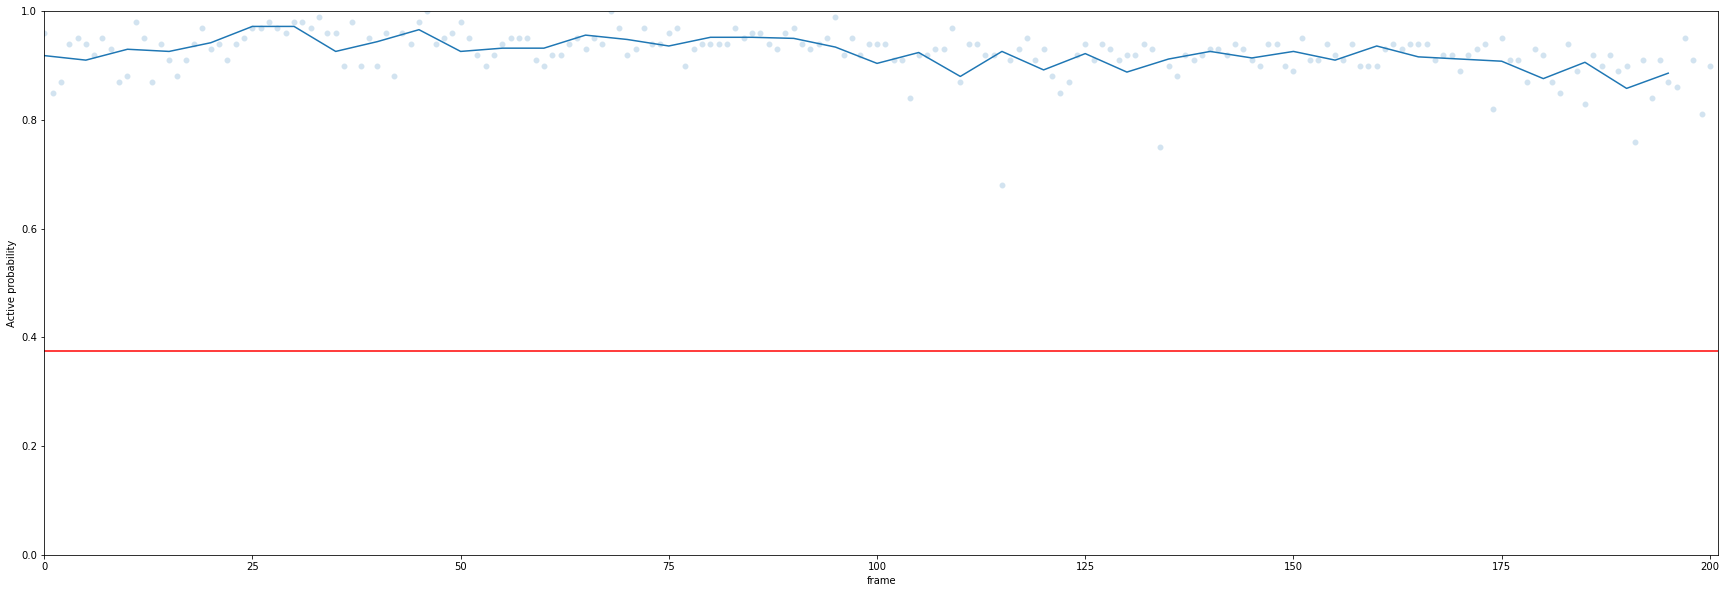

In [22]:
traj_viz(pdb_id, path_to_gpcrdb_files, dir_path, out_path, gpcrdb_alignment, gpcrdb_numeration, 
         one_mod_df,bi_mod_df, model, frames_dir_path, inv_d, res_contact_list, one_mod_feat,
         new_seq_aligned_to_GPCRdb_seq_database, canonical_residues_dict, his_types, d)